# Predicting Heart Disease 

In this this project we are using machine learning model to predict whether someone has heart disease or not base on there medical attributes.

Here are the steps we are going to follow:
1. Problem definition
2. Data collection
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Can we predict heart disease if medical attributes about a patient is given

## 2. Data Collection 
> This dataset was download from kaggle. https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/download?datasetVersionNumber=1 and the original data came from UCI Machine learning Repository

## Evaluation
> This is the beach mark we need to set for our accuracy. let set our accuracy to 95%

## Features
>** create Data Dictionary**

>* id (Unique id for each patient)
>* age (Age of the patient in years)
>* origin (place of study)
>* sex (Male/Female)
>* cp chest pain type ([typical angina, atypical angina, non-* anginal, asymptomatic])
>* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
>* chol (serum cholesterol in mg/dl)
>* fbs (if fasting blood sugar > 120 mg/dl)
>* restecg (resting electrocardiographic results)
>* -- Values: [normal, stt abnormality, lv hypertrophy]
>* thalach: maximum heart rate achieved
>* exang: exercise-induced angina (True/ False)
>* oldpeak: ST depression induced by exercise relative to rest
>* slope: the slope of the peak exercise ST segment
>* ca: number of major vessels (0-3) colored by fluoroscopy
>* thal: [normal; fixed defect; reversible defect]
>* condition: the predicted attribute


## These are the tools use in this project
> We are going to use pandas, Matplotlib and Numpy for our data analysis and manipulation

In [1]:
# Import all libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# For Our model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


## Load Data

In [2]:
df_heart_disease = pd.read_csv("heart_disease_uci_data.csv")
df_heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA ( Exploratry Data Analysis )
> The aims here is to get more insight about the dataset, we are working on 

In [3]:
# Checking the demensions of data with .shape
# It always a good practice to know how much data, in terms of rows and columns
# Because if the data is too small it can affect the model performance

df_heart_disease.shape

(303, 14)

We can see that, we have 303 rows and 14 columns, from .shape

### Getting Each Attribute's 
> Data Type
It a good practices to know the data type of each attribute, because somethings you might need to convert one data type to another
E.g int to float
float to int
convert to date time index

In [4]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### From the information above it show that we dont have missing data, and our data tyoe is also in line with our columns 

### Statistic Summary of the Data 
> This give the summary about the numeric data in our dataset such like, min, count, max etc

In [5]:
df_heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Reviewing Class Distribution
> Class Distribution is usefull in classification problems , where we need to know the balance of the class value. because imbalanced class distribution we make the model performance poor and lead to wrong prediction

#### Check Imbalance data
> The best practice is to check imbalance data when working with classification problem

In [6]:
# checking for imbalance data using value_count
df_heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

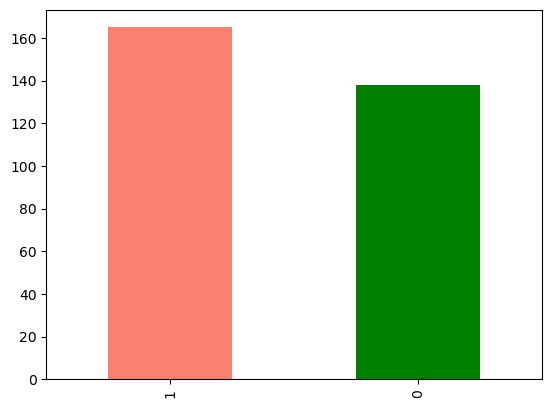

In [7]:
# let view our target in terms of bar chat
df_heart_disease["target"].value_counts().plot(kind = "bar", color = ["salmon", 'green']);

### Reviewing Correlation between Attributes
> It a good practice to review correlation as some machine learning algorithms such as Linear regression will perform poorly if we have highly correlated attributes

<Axes: >

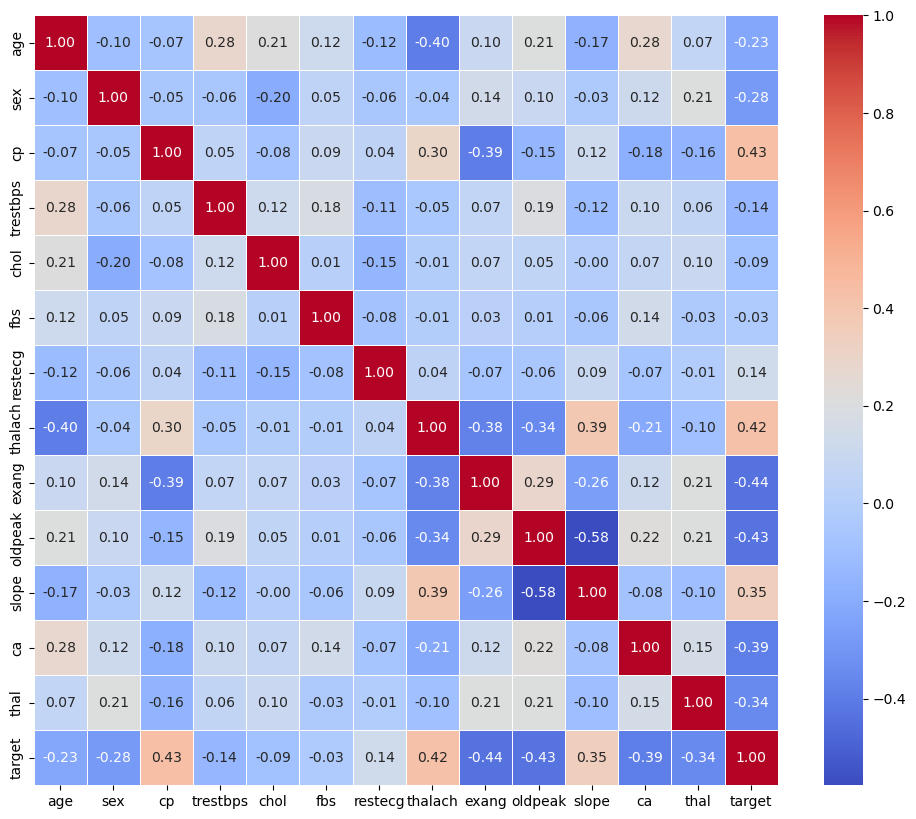

In [8]:
# review correlation attribute

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Compute the correlation matrix
corr_matrix = df_heart_disease.corr()

# Create a heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


#### NOTE 
> One of the reason we used corr() is to see if we have highly correlated values either positive or negative correlated
And this can indicate multicollinearity

## Understanding Data with Visualization

### Heart Disease according to Sex
> let check the pattern between female and male against the target

In [9]:
# compare sex with target
df_heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

#### Note
> The above show that we have more Male than Female in our dataset

In [10]:
# # compare sex with target
pd.crosstab(df_heart_disease.target, df_heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


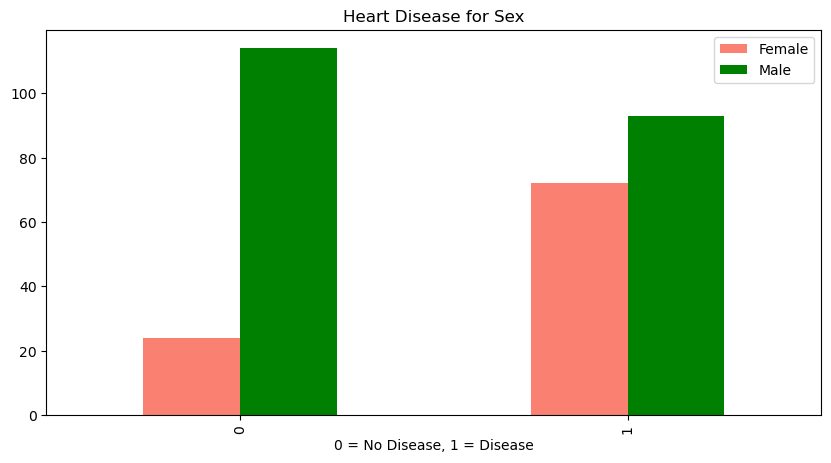

In [11]:
pd.crosstab(df_heart_disease.target, df_heart_disease.sex).plot(
    kind = "bar",
    figsize = (10,5),
    color = ["salmon", 'green']
)
plt.title("Heart Disease for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"]);


### Note
> That close to 75% of the female in our dataset might have heart Disease compare to portion of the male


### Age range that must likely have heart Disease

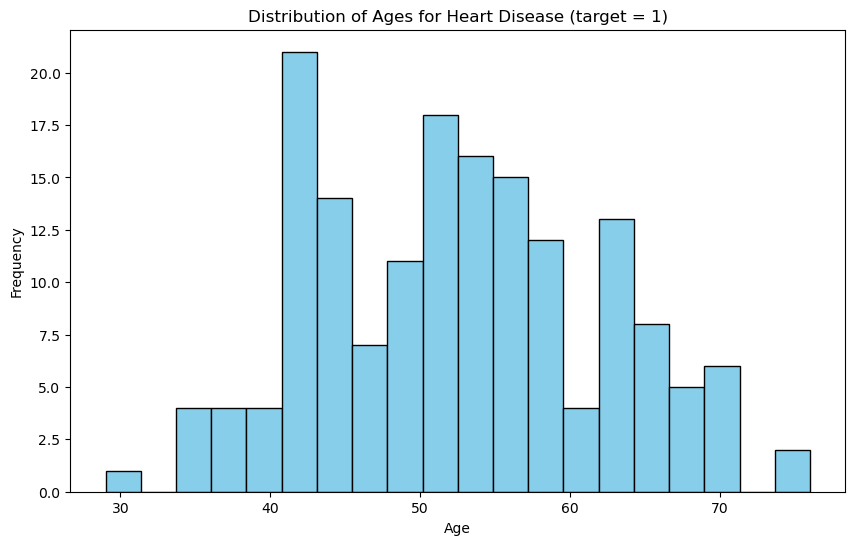

In [12]:
# Filter the DataFrame to include only rows where target is equal to 1
condition_1_data = df_heart_disease[df_heart_disease['target'] == 1]

# Create a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(condition_1_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages for Heart Disease (target = 1)')
plt.show()

### Note
> From the histogram, we can observe that the frequency of heart disease is higher in the age groups that are in the middle of the range, particularly around 50 to 60 years old. The frequency then appears to decrease for individuals who are in the younger (<40 years old) and older (>60 years old) age groups.

> This distribution suggests that middle-aged individuals are more frequently diagnosed with heart disease compared to younger and older age groups

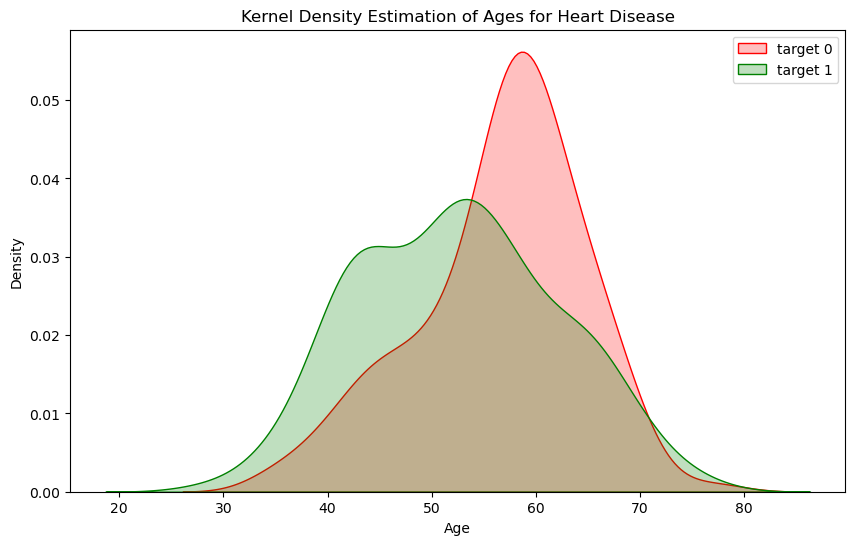

In [13]:

# Create separate DataFrames for condition == 0 and condition == 1
condition_0_data = df_heart_disease[df_heart_disease['target'] == 0]
condition_1_data = df_heart_disease[df_heart_disease['target'] == 1]

# Create KDE plots for the 'age' column
plt.figure(figsize=(10, 6))

sns.kdeplot(condition_0_data['age'], color='red', label='target 0', fill=True)
sns.kdeplot(condition_1_data['age'], color='green', label='target 1', fill=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Ages for Heart Disease')
plt.legend()
plt.show()

### Note
> From the graph, we can observe two distinct peaks for each condition, indicating the most common age ranges where heart disease is prevalent or absent.

>Condition 1, which likely represents individuals with heart disease, shows a peak at an older age compared to Condition 0. This suggests that heart disease is more common in older individuals.
The density for Condition 1 also appears to be more spread out, implying a wider age range of affected individuals, whereas Condition 0 has a narrower peak, suggesting a more concentrated age range without heart disease.



In [14]:
pd.crosstab(df_heart_disease.cp, df_heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


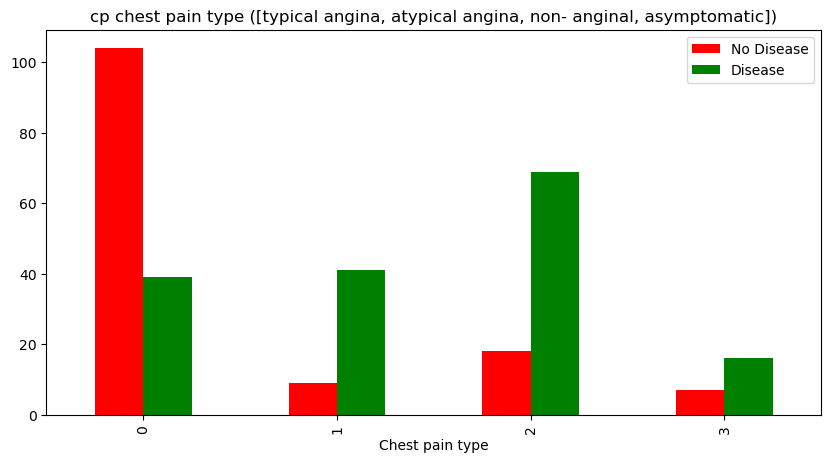

In [15]:
pd.crosstab(df_heart_disease.cp, df_heart_disease.target).plot(
    kind = "bar",
    figsize = (10,5),
    color = ["red", 'green']
)
plt.title("cp chest pain type ([typical angina, atypical angina, non- anginal, asymptomatic])")
plt.xlabel("Chest pain type")
plt.legend(["No Disease", "Disease"]);

### Note
> cp type 2 has larg portion of getting disease

> people with 0 type of cp has large portion of not get disease

# Modelling

In [16]:
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Let create a model function to handle these follows algoriths
> Logistic Regression

> k-Nearest Neighbors (KNN)

> Random Forest classifiers

In [17]:
X = df_heart_disease.drop("target", axis = 1)
y = df_heart_disease["target"]

# split into trainand test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2)

In [18]:

# Models to be trained
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Sample data loading (replace this with your actual data loading)
# X_train, X_test, y_train, y_test = load_data()

# Create a function
def train_models(models, X_train, X_test, y_train, y_test, random_state=42):
    """
    Train Logistic Regression, k-Nearest Neighbors (KNN), and Random Forest classifiers.

    Parameters:
    - X_train (DataFrame or array-like): Features for training.
    - X_test (DataFrame or array-like): Features for testing.
    - y_train (Series or array-like): Target variable for training.
    - y_test (Series or array-like): Target variable for testing.
    - random_state (int): Random seed for reproducibility.

    Returns:
    A dictionary containing trained models and their accuracy scores.
    """
    np.random.seed(42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a dictionary to store the models and their accuracy scores
    model_score = {}

    # Loop through the models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train_scaled, y_train)

        # Calculate accuracy
        accuracy = model.score(X_test_scaled, y_test)
        model_score[name] = accuracy

    # Return the dictionary of trained models and their accuracy scores
    return model_score

In [19]:
model_scores = train_models(
    models = models,
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test
)

model_scores

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.8032786885245902,
 'Random Forest': 0.7704918032786885}

### Model Comparing
> let make a graph to compare them

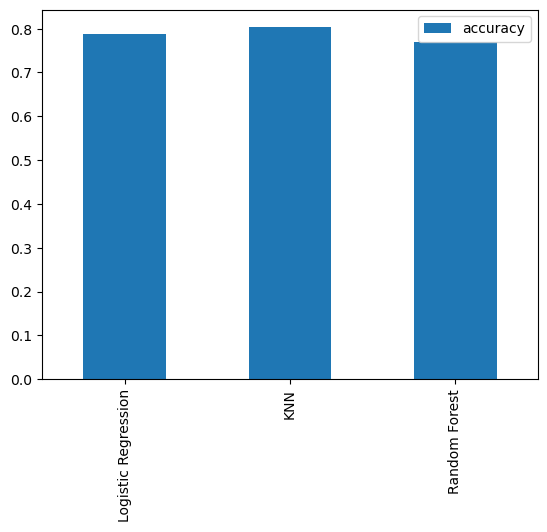

In [20]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning

In [21]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = list(range(1, 21))
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training and test scores lists
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))



In [22]:
train_scores



[1.0,
 0.8016528925619835,
 0.7933884297520661,
 0.78099173553719,
 0.7768595041322314,
 0.7603305785123967,
 0.7479338842975206,
 0.7396694214876033,
 0.731404958677686,
 0.7231404958677686,
 0.7231404958677686,
 0.6900826446280992,
 0.7148760330578512,
 0.7066115702479339,
 0.7231404958677686,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.7024793388429752]

In [23]:
test_scores

[0.5737704918032787,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.6065573770491803,
 0.6229508196721312,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.639344262295082]

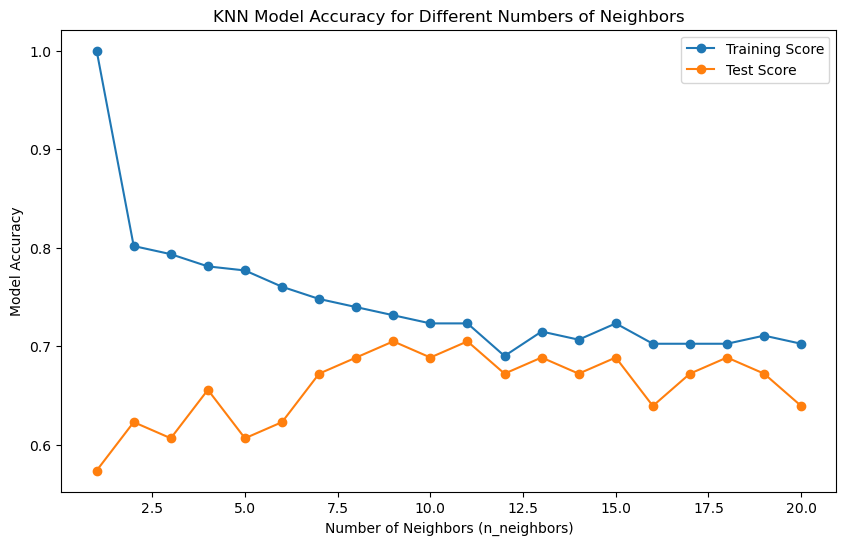

In [24]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, marker='o', label='Training Score')
plt.plot(neighbors, test_scores, marker='o', label='Test Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Model Accuracy')
plt.title('KNN Model Accuracy for Different Numbers of Neighbors')
plt.legend()
plt.show()